In [1]:
def border(aperture):
    together=[]
    for i, eachline in enumerate(aperture):
        for j, each in enumerate(eachline):
            if each==1:
                together.append([[j,j+1],[i,i]])
                together.append([[j,j+1],[i+1,i+1]])
                together.append([[j,j],[i,i+1]])
                together.append([[j+1,j+1],[i,i+1]])
    filtered=[]
    for each in together:
        c=0
        for EACH in together:
            if each==EACH:
                c+=1
        if c==1:
            filtered.append(each)
            
    return filtered

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from lightkurve import TessTargetPixelFile

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [6]:
hdul = fits.open("tess2018234152941-s0001-4-4-0120-s_ffic.fits")[0]
wcs = WCS(hdul.header)


sector1ffn='tess-s0001-4-4_83.40630967798376_-62.48977125108528_64x64_astrocut.fits'
tpf_s1 = TessTargetPixelFile(sector1ffn)

In [4]:
coord = SkyCoord(ra=83.40630967798376, dec=-62.48977125108528, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.1*32*1.414*21/3600, u.deg)
j = Gaia.cone_search_async(coord, radius)
r = j.get_results()
r.pprint()

Query finished.
         dist          ...
                       ...
---------------------- ...
5.2030643635554925e-06 ...
   0.00327731245051677 ...
  0.009260581924779184 ...
  0.010163180350853781 ...
  0.010232114986970185 ...
  0.010571988517761897 ...
  0.011291259288672972 ...
  0.011409032298542447 ...
  0.011498865367142749 ...
  0.011939990140685754 ...
                   ... ...
    0.2902291779564049 ...
    0.2902449607200544 ...
    0.2902527586203929 ...
   0.29025309481944134 ...
    0.2902618478458813 ...
    0.2902619481335399 ...
     0.290263731695323 ...
   0.29029045137346954 ...
   0.29032678519836996 ...
    0.2903327504180711 ...
Length = 15717 rows


In [5]:
!pwd

/home/szabopal/PycharmProjects/halophot2


In [7]:
extractedgaiadata=[
r[(r['phot_g_mean_mag'] < 17)]['source_id'],
r[(r['phot_g_mean_mag'] < 17)]['ra'],
r[(r['phot_g_mean_mag'] < 17)]['dec'],
r[(r['phot_g_mean_mag'] < 17)]['phot_g_mean_mag'],
r[(r['phot_g_mean_mag'] < 17)]['phot_rp_mean_mag']]

In [8]:
sizearray=[]
for index, each in enumerate(extractedgaiadata[4]):
    if np.isscalar(each):
        sizearray.append(each)
    else:
        sizearray.append(extractedgaiadata[3][index])
brightness=np.asarray(sizearray)
sizearray=np.asarray(sizearray)

In [9]:
sizearray = 60*(np.max(sizearray)-sizearray)

In [51]:
sector1ffn='tess-s0001-4-4_83.40630967798376_-62.48977125108528_62x62_astrocut.fits'
tpf_s1 = TessTargetPixelFile(sector1ffn)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.pcolormesh(np.log(tpf_s1.flux[eachindex]+2))

spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_spoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='magenta', linewidth=7)

customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)

ax = fig.gca()
for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])


FileNotFoundError: [Errno 2] No such file or directory: 'tess-s0001-4-4_83.40630967798376_-62.48977125108528_62x62_astrocut.fits'

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


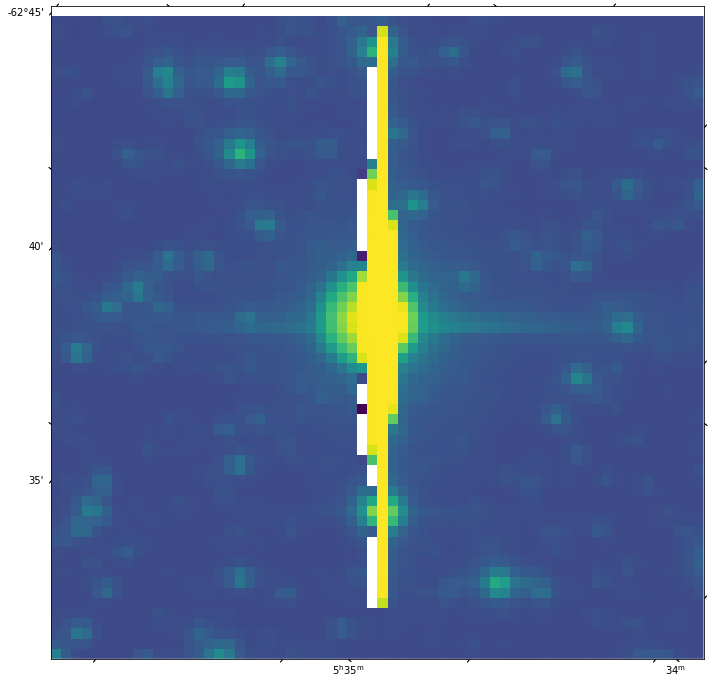

In [46]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.imshow(np.log(tpf_s1.flux[eachindex]))



In [41]:
ax.get_offset_position()

AttributeError: 'WCSAxesSubplot' object has no attribute 'get_offset_position'

In [48]:
!pwd

/home/szabopal/PycharmProjects/halophot2


In [49]:
!ls -lrt

total 1307824
-rw-rw-r-- 1 szabopal szabopal     25920 márc  29 10:00 tess2018234152941-s0001-4-4-0120-s_ffic.fits
-rw-rw-r-- 1 szabopal szabopal 602576640 márc  29 10:05 tess2018234235059-s0002-0000000149346418-0121-s_tp.fits
-rw-rw-r-- 1 szabopal szabopal 105186240 márc  29 10:33 tess-s0001-4-4_83.40630967798376_-62.48977125108528_64x64_astrocut.fits
-rw-rw-r-- 1 szabopal szabopal    283495 márc  29 10:50 Draft_programme_Space Summer School_ June 24-July 5, 2019, SCK•CEN Mol, Belgium.pdf
-rw-rw-r-- 1 szabopal szabopal    161858 márc  29 10:56 betador1.png
-rw-rw-r-- 1 szabopal szabopal    161645 márc  29 11:02 betador2.png
-rw-rw-r-- 1 szabopal szabopal    112644 márc  29 11:48 betador_eredeti_es_eltolt_csillagok.png
-rw-rw-r-- 1 szabopal szabopal    101543 márc  29 11:48 betador_eltolt_csillagok.png
-rw-rw-r-- 1 szabopal szabopal     48086 márc  29 11:49 betador_eltolt_csillagok_eltolt_label_levagott_kep.png
-rw-rw-r-- 1 szabopal szabopal     15234 márc  29 12:03 betador_LC_all64x64

In [50]:
!unzip astrocut_83.4063022163338_-62.4898119723424_62x62px.zip

Archive:  astrocut_83.4063022163338_-62.4898119723424_62x62px.zip
 extracting: tess-s0001-4-4_83.4063022163338_-62.4898119723424_62x62_astrocut.fits  
 extracting: tess-s0002-4-1_83.4063022163338_-62.4898119723424_62x62_astrocut.fits  
 extracting: tess-s0003-4-1_83.4063022163338_-62.4898119723424_62x62_astrocut.fits  
 extracting: tess-s0004-4-1_83.4063022163338_-62.4898119723424_62x62_astrocut.fits  
 extracting: tess-s0005-4-2_83.4063022163338_-62.4898119723424_62x62_astrocut.fits  
 extracting: tess-s0006-4-2_83.4063022163338_-62.4898119723424_62x62_astrocut.fits  
 extracting: tess-s0007-4-2_83.4063022163338_-62.4898119723424_62x62_astrocut.fits  


/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


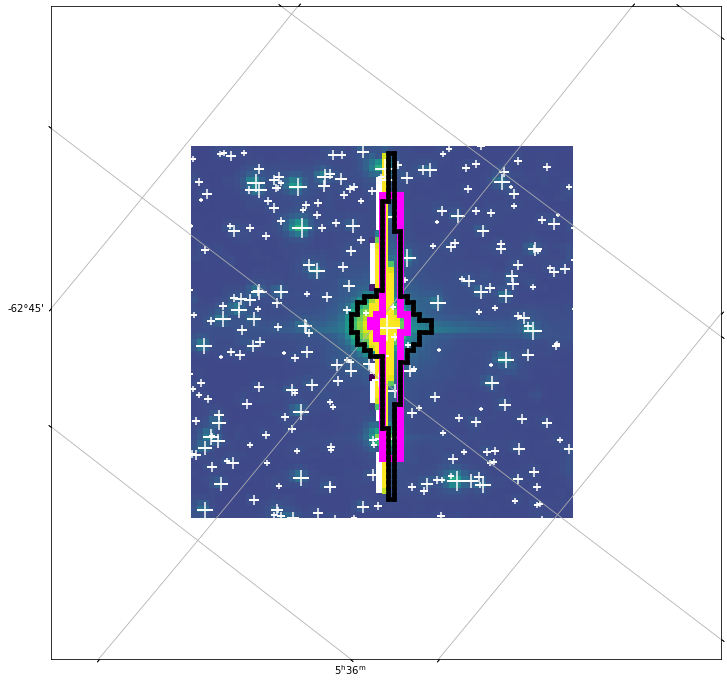

In [53]:
sector1ffn='tess-s0001-4-4_83.40630967798376_-62.48977125108528_62x62_astrocut.fits'
sector1ffn='tess-s0001-4-4_83.4063022163338_-62.4898119723424_62x62_astrocut.fits'
tpf_s1 = TessTargetPixelFile(sector1ffn)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.pcolormesh(np.log(tpf_s1.flux[eachindex]+2))

spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_spoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='magenta', linewidth=7)

customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)

ax = fig.gca()
for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])


In [ ]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(111, projection=wcs)
plt.pcolormesh(np.log(tpf_s1.flux[eachindex]+2))

spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
spocaper=np.asarray(spocaper)
spocaper=(spocaper == 75)*1
filtered_spoc=border(spocaper)
for x in range(len(filtered_spoc)):
    plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='magenta', linewidth=7)

customaper=np.genfromtxt('betador_s0001_customaperture.txt')
customaper=np.asarray(customaper)
customaper=(customaper == 3)*1
filtered_custom=border(customaper)
for x in range(len(filtered_custom)):
    plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)

ax = fig.gca()
for x in range(len(extractedgaiadata[0])):
    ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])


In [30]:
tpf_s1.flux[eachindex]+2

array([[873.6279 , 274.93192, 165.41821, ..., 166.05704, 156.52554,
        154.26588],
       [258.68558, 208.63039, 210.58723, ..., 156.32616, 152.52199,
        152.06699],
       [182.72003, 217.57585, 577.09686, ..., 157.21938, 155.44917,
        156.11395],
       ...,
       [165.77174, 156.44572, 143.6142 , ..., 150.89557, 149.9957 ,
        151.27477],
       [150.6168 , 147.01854, 144.67995, ..., 149.38187, 150.02744,
        155.0123 ],
       [  2.     ,   2.     ,   2.     , ...,   2.     ,   2.     ,
          2.     ]], dtype=float32)

In [28]:
np.log(tpf_s1.flux[eachindex]+2)

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([[6.7726545, 5.6165233, 5.1084766, ..., 5.1123314, 5.0532193,
        5.0386777],
       [5.5556135, 5.3405643, 5.3499   , ..., 5.0519447, 5.027309 ,
        5.024321 ],
       [5.207955 , 5.3825474, 6.3580103, ..., 5.057642 , 5.046319 ,
        5.050586 ],
       ...,
       [5.110612 , 5.052709 , 4.9671307, ..., 5.016588 , 5.010607 ,
        5.019098 ],
       [5.014739 , 4.9905586, 4.974524 , ..., 5.006506 , 5.010818 ,
        5.043504 ],
       [0.6931472, 0.6931472, 0.6931472, ..., 0.6931472, 0.6931472,
        0.6931472]], dtype=float32)

In [13]:
for eachindex in [954,1200]:
    
    proportiontosee=0.5

    fig = plt.figure(figsize=(12*proportiontosee,12))
    fig.add_subplot(111, projection=wcs)

    #plt.figure(figsize=(12,12))
    plt.pcolormesh(np.log(tpf_s1.flux[eachindex]))

    #filtered=border(tpf_s1.pipeline_mask*1)
    #for x in range(len(filtered)):
    #    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)




#    spocaper=np.genfromtxt('betador_s0001_spocaperture.txt')
#    spocaper=np.asarray(spocaper)
#    spocaper=(spocaper == 75)*1
#    filtered_spoc=border(spocaper)
#    for x in range(len(filtered_spoc)):
#        plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='magenta', linewidth=7)



#    customaper=np.genfromtxt('betador_s0001_customaperture.txt')
#    customaper=np.asarray(customaper)
#    customaper=(customaper == 3)*1
#    filtered_custom=border(customaper)
#    for x in range(len(filtered_custom)):
#        plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)



    #filtered_ourap=border(ourap)
    #for x in range(len(filtered_ourap)):
    #    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)

    ax = fig.gca()
    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])
    #    if brightness[x]<12:
    #        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    #for x in range(len(extractedgaiadata[0])):
    #    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x]+5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])        
        if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
            ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlim([64*(1-proportiontosee)/2, 64*(1+proportiontosee)/2])
    ax.set_ylim([0, 70])

    ax.coords.grid(True, color='green', ls='solid')
    
    plt.show()

AttributeError: Unknown property figsize

<Figure size 432x864 with 0 Axes>